## Building a regularised regression model 
Your task is to explore this synthetic telecom churn dataset to predict the mobile data usage of the customers. It is a simple dataset that allows you to explore the newly learnt ML skills.

### Churn dataset description 
The dataset contains information about telecommunications customer churn behaviour. It is a fictional telco company that provided mobile phone and internet services and the data is synthetic.   
It contains approximately 4000 records, each representing a customer, and contains a total of 8 variables/ features. These variables cover a variety of aspects related to the customer behaviour, demographic and contract types.

In [31]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import datetime

In [32]:
## Read in comma separated file 

df = pd.read_csv('./churn_data.csv',index_col = [0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prev_month_usage  3813 non-null   float64
 1   tenure            4000 non-null   float64
 2   contract_type     4000 non-null   object 
 3   dob               4000 non-null   object 
 4   country           4000 non-null   object 
 5   paperless         4000 non-null   int64  
 6   mob_data          3999 non-null   float64
 7   churn             4000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 281.2+ KB


In [34]:
df.head()

,prev_month_usage,tenure,contract_type,dob,country,paperless,mob_data,churn
0,NaN,17.0,Fixed Contract,03 August 1978,England,1,3.6708,1
1,1.278289,17.0,Fixed Contract,27 November 1972,Wales,0,1.4776,0
2,5.044904,14.0,Fixed Contract,09 December 1981,England,1,5.0345,1
3,NaN,21.0,Rolling Contract,31 May 1992,Wales,1,11.3131,1
4,3.384626,23.0,Fixed Contract,28 December 1976,Scotland,1,2.6148,0


### Data cleaning

In [35]:
def clean(df):
    ## Removing missing values 
    df.dropna(inplace=True)
    
    # Changing categorical variables value 
    df['contract_type'] = df['contract_type'].str.replace('rolling contract','Rolling Contract')
    df['contract_type'] = df['contract_type'].str.replace('Fixed-contract','Fixed Contract')
    
    # Assuming your DataFrame is called df and the birth date column is 'birth_date'
    df['dob'] = pd.to_datetime(df['dob'], dayfirst = True)
    current_date = datetime.datetime.now()
    df['age'] = (current_date - df['dob']).astype('<m8[Y]')
    
    return df

In [36]:
df = clean(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 1 to 3999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   prev_month_usage  3812 non-null   float64       
 1   tenure            3812 non-null   float64       
 2   contract_type     3812 non-null   object        
 3   dob               3812 non-null   datetime64[ns]
 4   country           3812 non-null   object        
 5   paperless         3812 non-null   int64         
 6   mob_data          3812 non-null   float64       
 7   churn             3812 non-null   int64         
 8   age               3812 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 297.8+ KB


### Model training

In [37]:
# Extract the predictors and target 

X = df.drop(columns = ['mob_data', 'dob']) # dropping target variable and unnecessary 
y = df['mob_data']

In [38]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=456)

In [39]:
# Checking input sample size are correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3049, 7)
y_train shape: (3049,)
X_test shape: (763, 7)
y_test shape: (763,)


In [40]:
# One-hot encoding on predictive features 
## One-hot encoding on categorical columsn before training the model 
X_train_encoded = pd.get_dummies(X_train, columns=['contract_type','country'], drop_first =True)
X_test_encoded = pd.get_dummies(X_test, columns=['contract_type', 'country'],drop_first =True)

In [41]:
def train_and_test(model):
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')

In [42]:
models = [Lasso(),Ridge()]

for model in models:
    train_and_test(model)

MAE = 0.743
RMSE = 0.959
MAE = 0.712
RMSE = 0.902


In [43]:
# First let's have a function that allows you to print the performance metric

def get_reg_results(truth, prediction, df, idx):
    '''
    This function generates a results dataframe given your y_test and predictions. 
    It allows you to take the output of this function and put it into the next time you call the function
    Filling out the entirity of the dataframe one function call (and row) at a time
    Inputs:
    - truth = y_test, the actual values
    - prediction = your predictions
    - df = a dataframe that is already set up to hold our data. 
    - idx = the method that you are using (which corresponds to a row index)
    Output:
    - the input df, but with another row filled out
    '''
    
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    
    SS_Residual = sum((truth-prediction)**2)       
    SS_Total = sum((truth-np.mean(truth))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    
    r2 = round(r_squared, 3)
    
    df.loc[idx, :] = [rmse, mae, r2]
    
    return df

In [44]:
# LASSO 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso

# Create a Ridge regression object
lasso = Lasso()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
lasso.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test_encoded)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [45]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge'], columns = ['RMSE', 'MAE', 'R2'])

results = get_reg_results(y_test, y_pred, results, 'Lasso')
results

,RMSE,MAE,R2
Lasso,0.959,0.743,0.945
Ridge,NaN,NaN,NaN


In [46]:
lasso_df = pd.DataFrame({'variable': list(X_train_encoded.columns), 'estimate': lasso.coef_})
lasso_df = lasso_df.sort_values('estimate')
lasso_df

,variable,estimate
4,age,-0.228792
1,tenure,0.000000
2,paperless,0.000000
3,churn,0.000000
5,contract_type_Rolling Contract,0.000000
6,country_NI,-0.000000
7,country_Scotland,0.000000
8,country_Wales,-0.000000
0,prev_month_usage,0.387393


In [47]:
lasso_df[lasso_df['estimate'] == 0]

,variable,estimate
1,tenure,0.0
2,paperless,0.0
3,churn,0.0
5,contract_type_Rolling Contract,0.0
6,country_NI,-0.0
7,country_Scotland,0.0
8,country_Wales,-0.0


In [48]:
lasso_df[lasso_df['estimate'] != 0]

,variable,estimate
4,age,-0.228792
0,prev_month_usage,0.387393


## Little extra visual to show you how LASSO coefficient shrinks when we increases alpha parameter (the regularisation strength)

In [51]:
## Creating the data to plot

lasso_reg = Lasso(alpha=0,random_state = 8)
lasso_reg.fit(X_train_encoded, y_train)
lasso_df = pd.DataFrame({'variable': list(X_train_encoded.columns), 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

# iterate lambdas
for i,alpha in enumerate(np.arange(0, 100, .1)):
    # training
    lasso_mod = Lasso(alpha=alpha, random_state = i)
    lasso_mod.fit(X_train_encoded, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_mod.coef_
    lasso_train_pred.append(lasso_mod.predict(X_train_encoded))
    lasso_test_pred.append(lasso_mod.predict(X_test_encoded))
    

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train_encoded, y_train)
C:\Users\Alicia Suen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Alicia Suen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+03, tolerance: 5.535e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lasso_df[var_name] = lasso_mod.coef_
C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\3033763255.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

C:\Users\Alicia Suen\AppData\Local\Temp\ipykernel_17300\2200356719.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


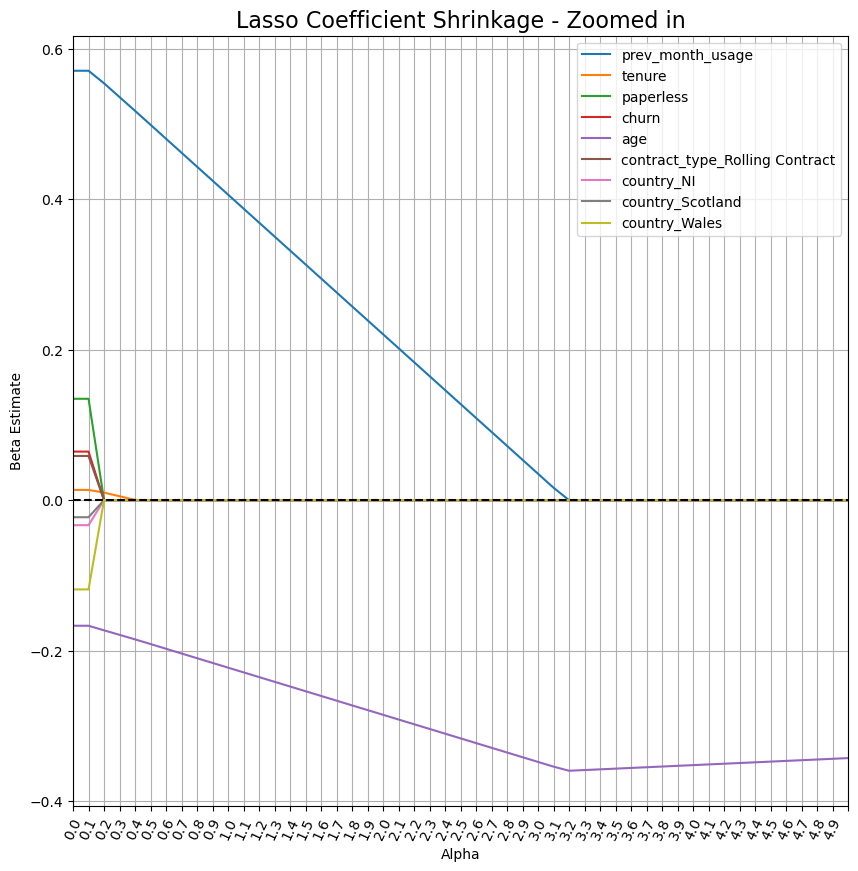

In [52]:
## Coefficient Shrinkage Plot
xlabels = [round(x,2) for x in np.arange(0, 5, .1)]
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(lasso_df.T.iloc[1:, :])
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_xlim([0,50])
ax.set_xticklabels(xlabels)
plt.xticks(rotation = 65)
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Coefficient Shrinkage - Zoomed in", fontsize=16)
ax.legend(loc = 'upper right', labels=lasso_df['variable'])
ax.grid(True)

In [20]:
# Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge

# Create a Ridge regression object
ridge = Ridge()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
ridge.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_encoded)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [21]:
results = get_reg_results(y_test, y_pred, results, 'Ridge')
results

,RMSE,MAE,R2
Lasso,0.959,0.743,0.945
Ridge,0.902,0.713,0.951


In [22]:
ridge_df = pd.DataFrame({'variable': list(X_train_encoded.columns), 'estimate': ridge.coef_})
ridge_df = ridge_df.sort_values('estimate')
ridge_df

,variable,estimate
4,age,-0.166901
10,country_Wales,-0.074848
5,contract_type_Fixed Contract,-0.029305
8,country_NI,0.010345
1,tenure,0.013591
9,country_Scotland,0.020900
6,contract_type_Rolling Contract,0.029305
7,country_England,0.043603
3,churn,0.064401
2,paperless,0.134479
